# Logistic Regression on MNIST (SGD: lr=0.1)

This is MLP (784-10) on MNIST. SGD algorithm (lr=0.1) with 100 epoches.


#### Original Method

    Total params: 7,850
    Trainable params: 7,850
    Non-trainable params: 0

    
####  LR with 7840 intrinsic dim    
    Total params: 61,559,690
    Trainable params: 7,840
    Non-trainable params: 61,551,850 

In [2]:
import os, sys
import numpy as np
from matplotlib.pyplot import *
%matplotlib inline

In [9]:
results_dir = '../results/lr_mnist_sgd'


class Results():
    def __init__(self):
        self.train_loss     = []
        self.train_accuracy = []
        self.train_loss = []
        self.valid_loss = []
        self.run_time   = []
        
    def add_entry(self, train_loss, train_accuracy, valid_loss, valid_accuracy, run_time):
        self.train_loss.append(train_loss)
        self.train_accuracy.append(train_accuracy)
        self.train_loss.append(train_loss)
        self.valid_loss.append(valid_loss)
        self.run_time.append(run_time)
      
    def add_entry_list(self, entry):
        self.add_entry(entry[0], entry[1], entry[2], entry[3], entry[4])
        
    def list2np(self):
        self.train_loss     = []
        self.train_accuracy = []
        self.train_loss = []
        self.valid_loss = []
        self.run_time   = []        

dim = [10, 50, 100, 300, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 7850]
i = 0        

# filename list of diary
diary_names = []
for subdir, dirs, files in os.walk(results_dir):
    for file in files:
        if file == 'diary':
            fname = os.path.join(subdir, file)
            diary_names.append(fname)

            
diary_names_ordered = []
for d in dim:
    for f in diary_names:
        if ('_'+str(d)+'/' in f) and ('fnn_mnist_200_200' not in f):
            print "%d is in" % d + f
            diary_names_ordered.append(f)
        if '_dir/' in f:
            diary_names_dir = f
         
print diary_names_ordered    
        
# extrinsic update  method
with open(diary_names_dir,'r') as ff:
    lines0 = ff.readlines()
    R_dir = extract_num(lines0)

print "LR model:\n" + str(R_dir) + "\n"

# intrinsic update method
Rs = []
i = 0
for fname in diary_names_ordered:
    with open(fname,'r') as ff:
        lines0 = ff.readlines()
        R = extract_num(lines0)
        print "%d dim:\n"%dim[i] + str(R) + "\n"
        i += 1

        Rs.append(R)
                            
Rs = np.array(Rs)




10 is in../results/lr_mnist_sgd/170706_020027_ae92905_master_fnn_mnist_10/diary
50 is in../results/lr_mnist_sgd/170706_020129_ae92905_master_fnn_mnist_50/diary
100 is in../results/lr_mnist_sgd/170706_020229_ae92905_master_fnn_mnist_100/diary
300 is in../results/lr_mnist_sgd/170706_020330_ae92905_master_fnn_mnist_300/diary
500 is in../results/lr_mnist_sgd/170706_020431_ae92905_master_fnn_mnist_500/diary
1000 is in../results/lr_mnist_sgd/170706_020533_ae92905_master_fnn_mnist_1000/diary
2000 is in../results/lr_mnist_sgd/170706_020639_ae92905_master_fnn_mnist_2000/diary
3000 is in../results/lr_mnist_sgd/170706_020751_ae92905_master_fnn_mnist_3000/diary
4000 is in../results/lr_mnist_sgd/170706_020909_ae92905_master_fnn_mnist_4000/diary
5000 is in../results/lr_mnist_sgd/170706_021033_ae92905_master_fnn_mnist_5000/diary
6000 is in../results/lr_mnist_sgd/170706_021203_ae92905_master_fnn_mnist_6000/diary
7000 is in../results/lr_mnist_sgd/170706_021338_ae92905_master_fnn_mnist_7000/diary
7850 i

In [10]:
def extract_num(lines0):

    valid_loss_str     = lines0[-5]
    valid_accuracy_str = lines0[-6]
    train_loss_str     = lines0[-8]
    train_accuracy_str = lines0[-9]
    run_time_str       = lines0[-10]

    valid_loss     = float(valid_loss_str.split( )[-1])
    valid_accuracy = float(valid_accuracy_str.split( )[-1])
    train_loss     = float(train_loss_str.split( )[-1])
    train_accuracy = float(train_accuracy_str.split( )[-1])
    run_time       = float(run_time_str.split( )[-1])
    
    return valid_loss, valid_accuracy, train_loss, train_accuracy, run_time

## Performance comparison with Baseline

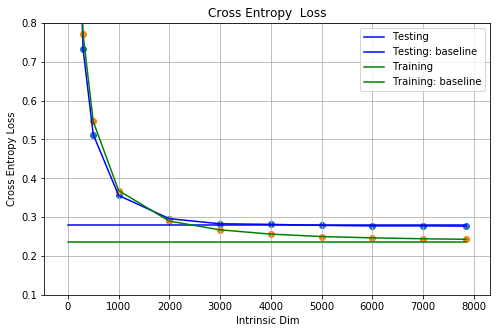

In [11]:
N = Rs.shape[0]
fig, ax = subplots(1)
ax.plot(dim, Rs[:,0],'b-', label="Testing")
ax.plot(dim, R_dir[0]*np.ones(N),'b-', label="Testing: baseline")
ax.plot(dim, Rs[:,2],'g-', label="Training")
ax.plot(dim, R_dir[2]*np.ones(N),'g-', label="Training: baseline")

ax.scatter(dim, Rs[:,0])
ax.scatter(dim, Rs[:,2])


ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Cross Entropy Loss')
ax.set_title('Cross Entropy  Loss')
ax.legend()
ax.grid()
ax.set_ylim([0.1,0.8])
fig.set_size_inches(8, 5)

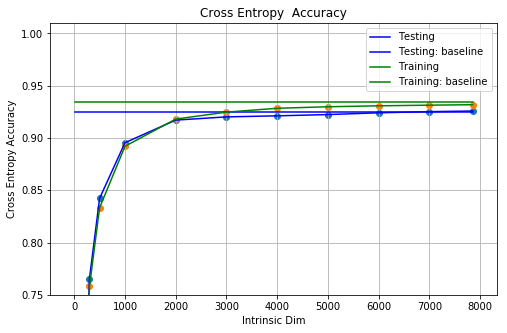

In [12]:
fig, ax = subplots(1)
ax.plot(dim, Rs[:,1],'b-', label="Testing")
ax.plot(dim, R_dir[1]*np.ones(N),'b-', label="Testing: baseline")
ax.plot(dim, Rs[:,3],'g-', label="Training")
ax.plot(dim, R_dir[3]*np.ones(N),'g-', label="Training: baseline")
ax.scatter(dim, Rs[:,1])
ax.scatter(dim, Rs[:,3])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Cross Entropy Accuracy')
ax.set_title('Cross Entropy  Accuracy')
ax.legend()
ax.grid()
ax.set_ylim([0.75,1.01])
fig.set_size_inches(8, 5)

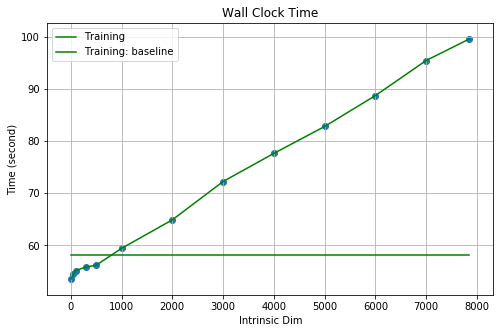

In [13]:
fig, ax = subplots(1)
ax.plot(dim, Rs[:,4],'g-', label="Training")
ax.plot(dim, R_dir[4]*np.ones(N),'g-', label="Training: baseline")
ax.scatter(dim, Rs[:,4])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Time (second)')
ax.set_title('Wall Clock Time')
ax.legend()
ax.grid()
# ax.set_ylim([0.75,100.01])
fig.set_size_inches(8, 5)

## Performance Per Dim

[[  2.23390000e-01   2.06800000e-02   2.24115000e-01   1.99020000e-02
    5.35803000e+00]
 [  3.80402000e-02   7.21600000e-03   3.87102000e-02   7.00000000e-03
    1.08940200e+00]
 [  1.52780000e-02   4.96700000e-03   1.57988000e-02   4.74140000e-03
    5.51709000e-01]
 [  2.44301333e-03   2.55133333e-03   2.56991333e-03   2.52653333e-03
    1.86116333e-01]
 [  1.02567200e-03   1.68460000e-03   1.09278600e-03   1.66664000e-03
    1.12372600e-01]
 [  3.55907000e-04   8.95500000e-04   3.68610000e-04   8.92040000e-04
    5.94171000e-02]
 [  1.48024500e-04   4.58550000e-04   1.44862000e-04   4.59040000e-04
    3.24413000e-02]
 [  9.43183333e-05   3.06733333e-04   8.90980000e-05   3.08246667e-04
    2.40775333e-02]
 [  7.03457500e-05   2.30300000e-04   6.40675000e-05   2.32105000e-04
    1.94072250e-02]
 [  5.57682000e-05   1.84480000e-04   5.00114000e-05   1.85976000e-04
    1.65571600e-02]
 [  4.62328333e-05   1.54016667e-04   4.11090000e-05   1.55130000e-04
    1.47851333e-02]
 [  3.9644

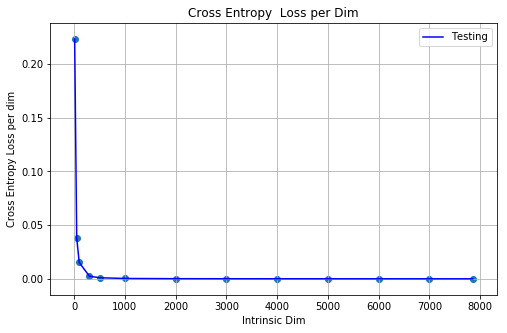

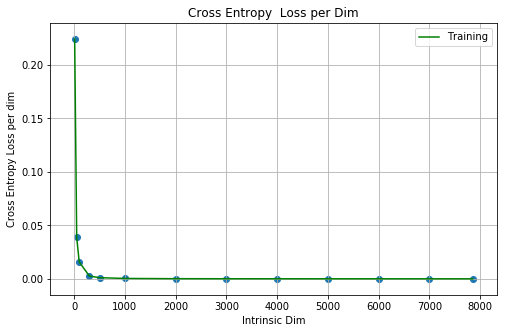

In [14]:
NRs = Rs/np.array(dim).reshape(N,1)
print NRs

fig, ax = subplots(1)
ax.plot(dim, NRs[:,0],'b-', label="Testing")
ax.scatter(dim, NRs[:,0])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Cross Entropy Loss per dim')
ax.set_title('Cross Entropy  Loss per Dim')
ax.legend()
ax.grid()
fig.set_size_inches(8, 5)

fig, ax = subplots(1)
ax.plot(dim, NRs[:,2],'g-', label="Training")
ax.scatter(dim, NRs[:,2])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Cross Entropy Loss per dim')
ax.set_title('Cross Entropy  Loss per Dim')
ax.legend()
ax.grid()
fig.set_size_inches(8, 5)

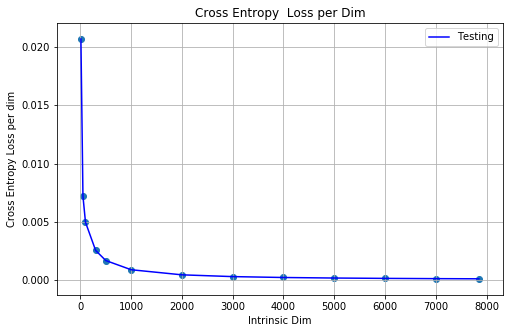

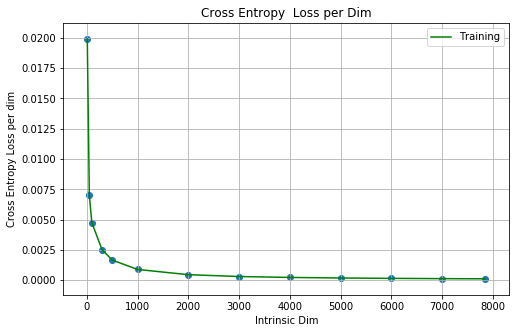

In [15]:
fig, ax = subplots(1)
ax.plot(dim, NRs[:,1],'b-', label="Testing")
ax.scatter(dim, NRs[:,1])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Cross Entropy Loss per dim')
ax.set_title('Cross Entropy  Loss per Dim')
ax.legend()
ax.grid()
fig.set_size_inches(8, 5)

fig, ax = subplots(1)
ax.plot(dim, NRs[:,3],'g-', label="Training")
ax.scatter(dim, NRs[:,3])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Cross Entropy Loss per dim')
ax.set_title('Cross Entropy  Loss per Dim')
ax.legend()
ax.grid()
fig.set_size_inches(8, 5)

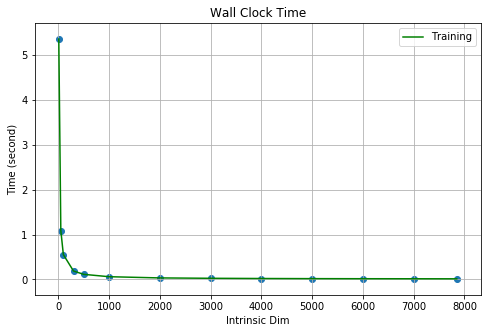

In [16]:
fig, ax = subplots(1)
ax.plot(dim, NRs[:,4],'g-', label="Training")
ax.scatter(dim, NRs[:,4])

ax.set_xlabel('Intrinsic Dim')
ax.set_ylabel('Time (second)')
ax.set_title('Wall Clock Time')
ax.legend()
ax.grid()
# ax.set_ylim([0.75,100.01])
fig.set_size_inches(8, 5)